過去 0 / 6241 now
過去 1 / 6241 now
過去 2 / 6241 now
過去 3 / 6241 now
過去 4 / 6241 now
過去 5 / 6241 now
過去 6 / 6241 now
過去 7 / 6241 now
過去 8 / 6241 now
過去 9 / 6241 now
過去 10 / 6241 now
過去 11 / 6241 now
過去 12 / 6241 now
過去 13 / 6241 now
過去 14 / 6241 now
過去 15 / 6241 now
過去 16 / 6241 now
過去 17 / 6241 now
過去 18 / 6241 now
過去 19 / 6241 now
過去 20 / 6241 now
過去 21 / 6241 now
過去 22 / 6241 now
過去 23 / 6241 now
過去 24 / 6241 now
過去 25 / 6241 now
過去 26 / 6241 now
過去 27 / 6241 now
過去 28 / 6241 now
過去 29 / 6241 now
過去 30 / 6241 now
過去 31 / 6241 now
過去 32 / 6241 now
過去 33 / 6241 now
過去 34 / 6241 now
過去 35 / 6241 now
過去 36 / 6241 now
過去 37 / 6241 now
過去 38 / 6241 now
過去 39 / 6241 now
過去 40 / 6241 now
過去 41 / 6241 now
過去 42 / 6241 now
過去 43 / 6241 now
過去 44 / 6241 now
過去 45 / 6241 now
過去 46 / 6241 now
過去 47 / 6241 now
過去 48 / 6241 now
過去 49 / 6241 now
過去 50 / 6241 now
過去 51 / 6241 now
過去 52 / 6241 now
過去 53 / 6241 now
過去 54 / 6241 now
過去 55 / 6241 now
過去 56 / 6241 now
過去 57 / 6241 now
過去 58 / 6241 now
過去 59 /

<ipython-input-1-9c42df5a9cc1>:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 2, 2*i+1, projection=ccrs.PlateCarree())


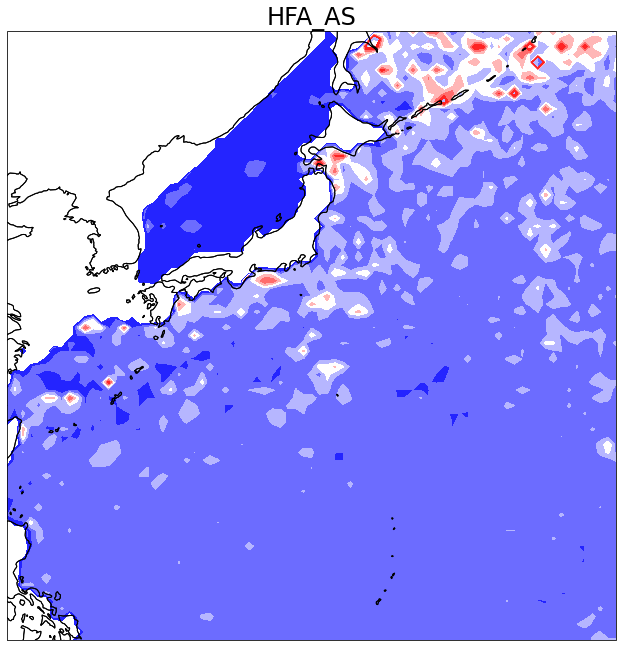

In [1]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import func
import cartopy.crs as ccrs


"""
過去(HPA)と未来(HPA_c0)それぞれの100年RVの比較図の描画
・KFが安定しているので, KFをまずはやる
・c0が代表的なシナリオなので, 過去のデータとc0を比較する
・ASで速度変化を測定(forをwithの外に出すのと, パラメータの1個目の探索範囲をN=40にした)
"""

# MODEL = ['AS', 'KF', 'YS']
MODEL = ['AS']

# 緯度と経度の設定
with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)
# strになっているので, floatにcast
for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

# 緯度経度の最大・最小
lat_s = lats[0][0]
lat_n = lats[0][-1]
lon_w = lons[0][0]
lon_e = lons[-1][0]

for i in range(len(MODEL)):
    model = MODEL[i]
    rv_p = np.zeros((79, 79))  # 過去
    rv_f = np.zeros((79, 79))  # 未来
    # 総データ数の取り出し(過去)
    with open('../csv2/HPA_' + model + '_CNT.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        CNT = int(list(csv_reader)[0][0])
    # POTデータの取り出し(過去)
    with open('../csv2/HPA_' + model + '_POT.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        POT_ALL = list(csv_reader)
    for index in range(79 * 79):
        print("過去", index, "/", 79*79, "now")
        POT = POT_ALL[index]
        # データ数を削減する
        s = [float(val) for val in POT]
        # データ数が62未満は0
        if len(s) < 62:
            rv_p[index // 79][index % 79] = 0
        else:
            s = sorted(s, reverse=True)
            # 上位年数＊2個のデータを使用する
            s = s[:62]
            thr = s[-1]  # 閾値は最小値
            rv = func.lwm_gpd(data=s, error=[0.05], thr=thr, period=31, RP=100, n=CNT, n0=len(s), con=0.95, img_name=model)
            rv_p[index // 79][index % 79] = rv
        
    # 総データ数の取り出し(未来)
    with open('../csv2/HFA_' + model + '_c0_CNT.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        CNT = int(list(csv_reader)[0][0])
    # POTデータの取り出し(未来)
    with open('../csv2/HFA_' + model + '_c0_POT.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        POT_ALL = list(csv_reader)
    for index in range(79 * 79):
        print("未来", index, "/", 79*79, "now")
        POT = POT_ALL[index]
        # データ数を削減する
        s = [float(val) for val in POT]
        # データ数が50未満は0
        if len(s) < 50:
            rv_p[index // 79][index % 79] = 0
        else:
            s = sorted(s, reverse=True)
            # 上位年数＊2個のデータを使用する
            s = s[:50]
            thr = s[-1]  # 閾値は最小値
            rv = func.lwm_gpd(data=s, error=[0.05], thr=thr, period=25, RP=100, n=CNT, n0=len(s), con=0.95, img_name=model)
            rv_f[index // 79][index % 79] = rv
    
fig = plt.figure(figsize=(24, 30))
levels = np.arange(10, 50, 5)  # 等値線の間隔を指定
# 左側の図
ax = fig.add_subplot(1, 2, 2*i+1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, rv_p, levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
ax.coastlines()
ax.set_title('HPA_' + model, fontsize=24)

# 右側の図
ax = fig.add_subplot(1, 2, 2*i+1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, rv_f, levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
ax.coastlines()
ax.set_title('HFA_' + model, fontsize=24)

plt.show()

In [2]:
import csv

with open('HFA_AS_c0.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(rv_f)
with open('HPA_AS.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(rv_p)